## Heart Failure Prediction (FINAL)
### name: Luigi Otoya
### Course: CSc 447 Machine Learning

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from matplotlib.colors import ListedColormap

## %matplotlib

#### Interpreting the data
**[0] Age:** integer value  
**[1] Sex:** Male or Female, can change to Male=1, Female=0  
**[2] ChestPainType:**
  * **Value 1:** Typical angina   (TA)
  * **Value 2:** Atypical angina  (ATA)
  * **Value 3:** Non-anginal pain (NAP)
  * **Value 4:** Asymptomatic     (ASY)

**[3] RestingBP:** integer value  
**[4] Cholesterol:** integer value  
**[5] FastingBloodSugar:** integer value 0 or 1  
**[6] RestingElectrocardioGraphic Results:**
* **value 0:** normal
* **value 1:** ST
* **value 2:** showing probable or definite LVH(Left Ventricular Hypertrophy)

**[7] MaxHR:** integer value
**[8] ExerciseAngina:** Y or N, cam change to Y=1, N=0  
**[9] OldPeak:** ST depression induced by exercise relative to rest, integer value  
**[10] ST_Slope:** The slope of the peak exercise ST segment
* **value 0:** upsloping (Up)
* **value 1:** flat
* **value 2:** downsloping (down)

**[11] HeartDiesease:**
* **value 0:** < 50% diameter narrowing
* **value 1:** > 50% diameter narrowing

In [3]:
# read data set
df = pd.read_csv('heart.csv')  
df.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


## Pre-Process the data
* ### Determine Categorical and Numerical Variables
* ### Determine and Handle Outliers in the Data

In [4]:
# Check for missing values and duplicates
print('Duplicates:', df.duplicated().sum())
print('Missing Values:', df.isnull().sum().sum())

Duplicates: 0
Missing Values: 0


**Found  that there are no duplicates nor are there missing values in the data**

* ### Determine the Datatypes of the Data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 68.2+ KB


* ### Descriptive Statistical Summary of the Data

In [6]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [7]:
print('FastingBS values:', df.FastingBS.unique())
print('HeartDisease values:', df.HeartDisease.unique())

FastingBS values: [0 1]
HeartDisease values: [0 1]


#### **We have columns FastingBS and HeartDisease with only two possible numerical values, either 0 or 1.**

* ### Numerical Variables

In [8]:
def figDesign():
    plt.xlabel('')
    plt.ylabel('')
    plt.yticks(fontsize=15, color='black')
    plt.xticks(fontsize=15, color='black')
    plt.box(False)
    plt.title(i[1], fontsize=24, color='black')
    plt.tight_layout(pad=4.0)

In [9]:
numVar = df.select_dtypes(exclude='object')
numVarHeader = numVar.columns
numVar

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,40,140,289,0,172,0.0,0
1,49,160,180,0,156,1.0,1
2,37,130,283,0,98,0.0,0
3,48,138,214,0,108,1.5,1
4,54,150,195,0,122,0.0,0
...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1
914,68,144,193,1,141,3.4,1
915,57,130,131,0,115,1.2,1
916,57,130,236,0,174,0.0,1


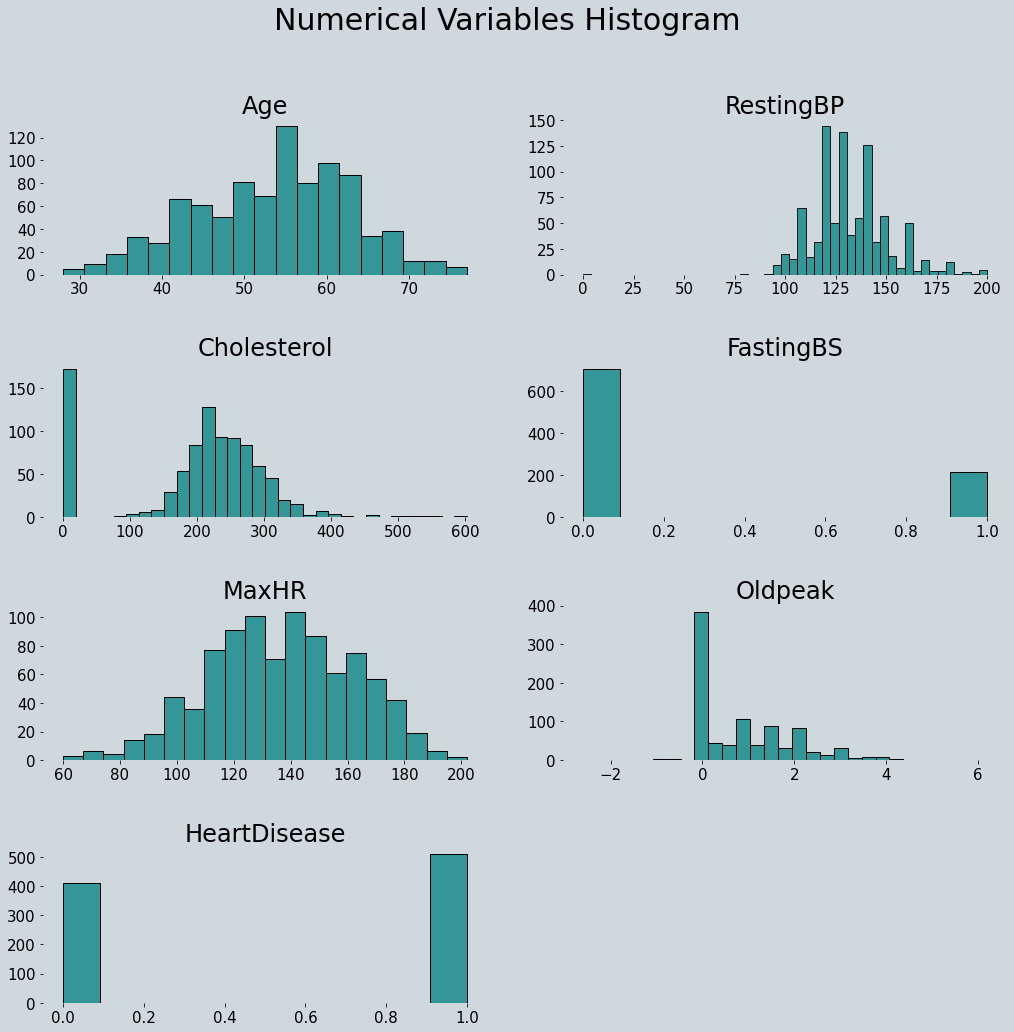

In [10]:
fig, ax = plt.subplots(figsize =(15, 15))
fig.patch.set_facecolor('#CFD8DC')

# enumerate returns two values: the index in i[0] and the value in i[1]
for i in (enumerate(numVarHeader)):
    plt.subplot(4, 2, i[0]+1)
    sns.histplot(x = i[1], data = df, color='teal', edgecolor='black')
    figDesign()
    plt.suptitle('Numerical Variables Histogram', fontsize=30)

* ### Catergorical Variables

In [11]:
catVar = df.select_dtypes(include='object')
catVarHeader = catVar.columns
catVar

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,M,ATA,Normal,N,Up
1,F,NAP,Normal,N,Flat
2,M,ATA,ST,N,Up
3,F,ASY,Normal,Y,Flat
4,M,NAP,Normal,N,Up
...,...,...,...,...,...
913,M,TA,Normal,N,Flat
914,M,ASY,Normal,N,Flat
915,M,ASY,Normal,Y,Flat
916,F,ATA,LVH,N,Flat


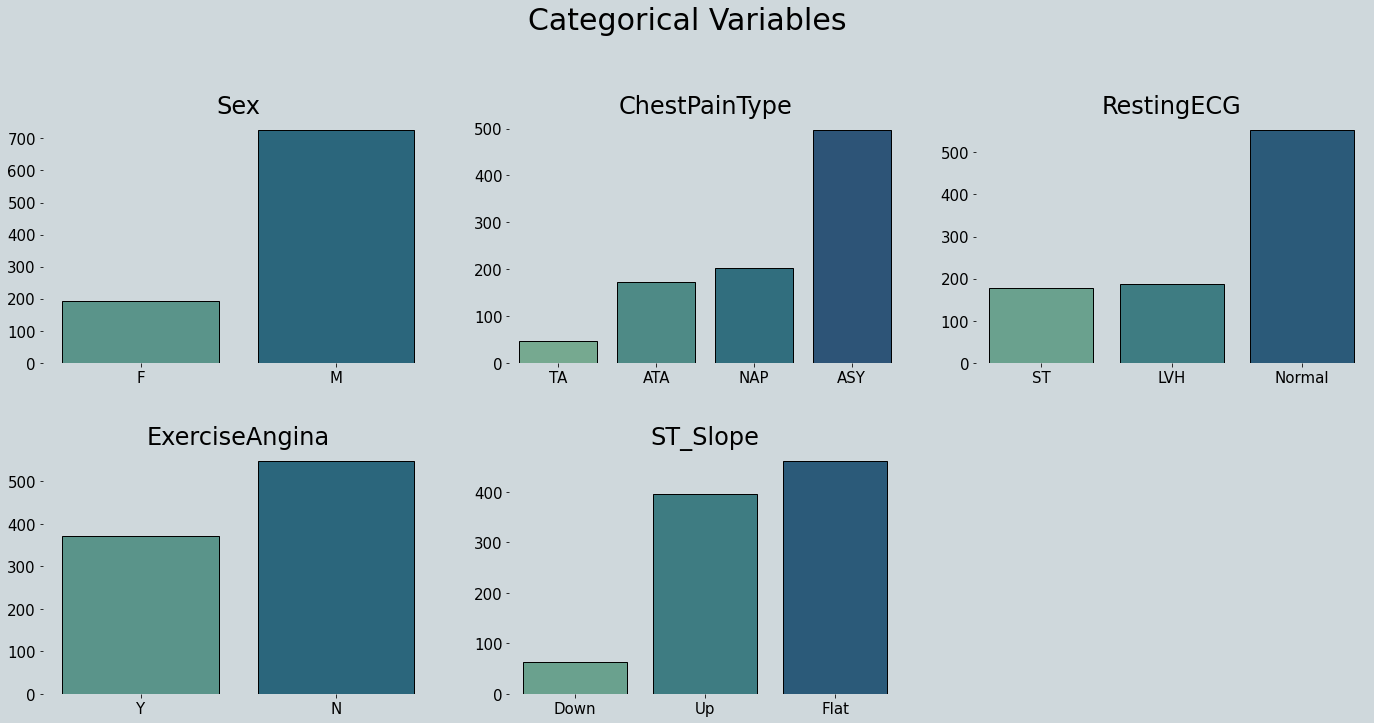

In [12]:
fig, ax = plt.subplots(figsize =(20, 15))
fig.patch.set_facecolor('#CFD8DC')

for i in (enumerate(catVarHeader)):
    plt.subplot(3, 3, i[0]+1)
    sns.countplot(x = i[1], data = df, order=df[i[1]].value_counts(ascending=True).index, palette='crest', edgecolor='black')
    figDesign()
    plt.suptitle('Categorical Variables', fontsize=30)

* ### Outliers
  * **We can use a boxplot to display the distribution of the data and find the outliers**
  * **First we must normalize the data**

Text(0.5, 1.0, 'Outliers')

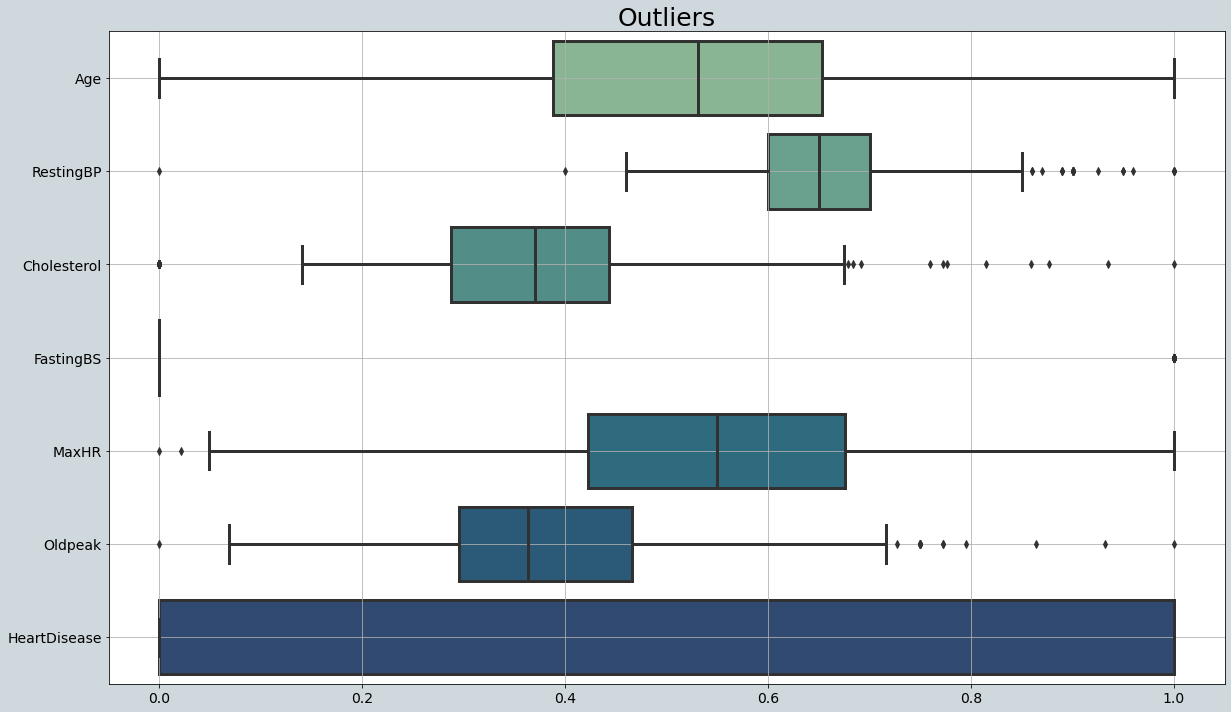

In [13]:
from sklearn.preprocessing import MinMaxScaler
fig, ax = plt.subplots(figsize =(20, 12))
fig.patch.set_facecolor('#CFD8DC')

# Normalize the data from [0, 1]
dfNorm = df.copy()

for header in numVarHeader:
  dfNorm[header] = MinMaxScaler().fit_transform(df[[header]])

sns.boxplot(data=dfNorm, ax=ax, palette='crest', orient="h", linewidth=3)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.grid(True)
ax.set_title('Outliers', fontsize=25)

  * **We can see from the graph above that there are outliers on MaxHR (max heartrate) equal to 0.**
  * **There are also outliers equal to 0 in RestingBloodPressure.**
  * **We should remove the outlier for RestingBP because a RestingBP of 0 can never get to zero.**
  * **Even a dead person will have BP > 0.**

In [14]:
outliers = dfNorm[dfNorm['RestingBP']==0]
outliers.value_counts(dfNorm['RestingBP'])


RestingBP
0.0    1
dtype: int64

In [86]:
# Here we can drop the row that contains the RestingBP of 0
dfMod = dfNorm.copy()
dfMod = dfMod.drop(dfMod[(dfMod['RestingBP'] == 0)].index)

# outliers = dfMod[dfMod['RestingBP'] == 0]
# outliers.value_counts(dfMod['RestingBP'])
dfMod

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,0.244898,M,ATA,0.70,0.479270,0.0,Normal,0.788732,N,0.295455,Up,0.0
1,0.428571,F,NAP,0.80,0.298507,0.0,Normal,0.676056,N,0.409091,Flat,1.0
2,0.183673,M,ATA,0.65,0.469320,0.0,ST,0.267606,N,0.295455,Up,0.0
3,0.408163,F,ASY,0.69,0.354892,0.0,Normal,0.338028,Y,0.465909,Flat,1.0
4,0.530612,M,NAP,0.75,0.323383,0.0,Normal,0.436620,N,0.295455,Up,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,0.346939,M,TA,0.55,0.437811,0.0,Normal,0.507042,N,0.431818,Flat,1.0
914,0.816327,M,ASY,0.72,0.320066,1.0,Normal,0.570423,N,0.681818,Flat,1.0
915,0.591837,M,ASY,0.65,0.217247,0.0,Normal,0.387324,Y,0.431818,Flat,1.0
916,0.591837,F,ATA,0.65,0.391376,0.0,LVH,0.802817,N,0.295455,Flat,1.0


## Convert Categorical Objects to Numerical Representations

In [108]:
# dfMod[dfMod['Sex'] == 'M'] = 1
# dfMod[dfMod['Sex'] == 'F'] = 0

# dfMod[dfMod['ChestPainType'] == 'TA']  = 1
# dfMod[dfMod['ChestPainType'] == 'ATA'] = 2
# dfMod[dfMod['ChestPainType'] == 'NAP'] = 3
# dfMod[dfMod['ChestPainType'] == 'ASY'] = 4

# dfMod = pd.get_dummies(dfMod, columns=catVarHeader)
# dfMod = pd.get_dummies(dfMod, columns=catVarHeader, drop_first=True)

firstSet = ['Sex', 'ExerciseAngina']
dfMod = pd.get_dummies(dfMod, prefix=firstSet, columns=firstSet, drop_first=True)
restSet = list(set(catVarHeader) - set(firstSet))
# Want to keep redundant columns 
dfMod = pd.get_dummies(dfMod, prefix=restSet, columns=restSet)
dfMod




,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ExerciseAngina_Y,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,RestingECG_LVH,RestingECG_Normal,RestingECG_ST
0,0.244898,0.70,0.479270,0.0,0.788732,0.295455,0.0,1,0,0,1,0,0,0,0,1,0,1,0
1,0.428571,0.80,0.298507,0.0,0.676056,0.409091,1.0,0,0,0,0,1,0,0,1,0,0,1,0
2,0.183673,0.65,0.469320,0.0,0.267606,0.295455,0.0,1,0,0,1,0,0,0,0,1,0,0,1
3,0.408163,0.69,0.354892,0.0,0.338028,0.465909,1.0,0,1,1,0,0,0,0,1,0,0,1,0
4,0.530612,0.75,0.323383,0.0,0.436620,0.295455,0.0,1,0,0,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,0.346939,0.55,0.437811,0.0,0.507042,0.431818,1.0,1,0,0,0,0,1,0,1,0,0,1,0
914,0.816327,0.72,0.320066,1.0,0.570423,0.681818,1.0,1,0,1,0,0,0,0,1,0,0,1,0
915,0.591837,0.65,0.217247,0.0,0.387324,0.431818,1.0,1,1,1,0,0,0,0,1,0,0,1,0
916,0.591837,0.65,0.391376,0.0,0.802817,0.295455,1.0,0,0,0,1,0,0,0,1,0,1,0,0


## Models

#### Split the Data into training and Testing

In [ ]:
from sklearn.model_selection import train_test_split
